# Access Text Analysis


In [78]:
import os
import string
import json
import nltk
import glob
import math
import pandas as pd
import matplotlib.pyplot as plt


from shutil import unpack_archive

from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [79]:
# Load CSV Files
print("Loading our CSV files into a bunch of dataframes")
df_dict = {}

for f in sorted(os.listdir(os.curdir)):
    if f.endswith('.csv'):
        print("Loading... ",f[:-4])
        df = pd.read_csv(f)
        df_dict[f[:-4]] = df
        

Loading our CSV files into a bunch of dataframes
Loading...  1998
Loading...  1999
Loading...  2000
Loading...  2001
Loading...  2002
Loading...  2003
Loading...  2004
Loading...  2005
Loading...  2006
Loading...  2007
Loading...  2008
Loading...  2009
Loading...  2010
Loading...  2011
Loading...  2012
Loading...  2013
Loading...  2014
Loading...  2015
Loading...  2016
Loading...  2017
Loading...  2018
Loading...  2019


In [85]:
print("how many of the abstracts do we have?\n")
print("year,bad_abs,total_abs,percent")


for d in df_dict:
    #print("\nYear",d,"\n")
    good_abs = 0
    abs_count = len(df_dict[d].abstract)
    for a in df_dict[d].abstract:
        if type(a) == type("str"):
            good_abs +=1
    #print(good_abs)
    #print(abs_count," total abstracts")
    print(d,",",good_abs,",",abs_count, good_abs/abs_count)
    

how many of the abstracts do we have?

year,bad_abs,total_abs,percent
1998 , 0 , 22 0.0
1999 , 0 , 27 0.0
2000 , 20 , 23 0.8695652173913043
2001 , 19 , 26 0.7307692307692307
2002 , 0 , 23 0.0
2003 , 19 , 20 0.95
2004 , 17 , 20 0.85
2005 , 16 , 22 0.7272727272727273
2006 , 0 , 27 0.0
2007 , 17 , 21 0.8095238095238095
2008 , 14 , 20 0.7
2009 , 19 , 20 0.95
2010 , 18 , 19 0.9473684210526315
2011 , 14 , 15 0.9333333333333333
2012 , 12 , 23 0.5217391304347826
2013 , 22 , 25 0.88
2014 , 19 , 20 0.95
2015 , 22 , 22 1.0
2016 , 25 , 27 0.9259259259259259
2017 , 19 , 29 0.6551724137931034
2018 , 18 , 24 0.75
2019 , 28 , 28 1.0


In [90]:

#Binary Sentiment

sid = SentimentIntensityAnalyzer()
summary = {"positive":0,"neutral":0,"negative":0}

for d in df_dict:
    for a in df_dict[d].abstract:
        if type(a) == type("str"):
            ss = sid.polarity_scores(a)
            if ss["compound"] == 0.0:
                #analysis = analysis.append({"Sent": "NEU", "Text": x},ignore_index=True)
                summary["neutral"] +=1
            elif ss["compound"] > 0.0:
                #analysis = analysis.append({"Sent": "POS", "Text": x},ignore_index=True)
                summary["positive"] +=1
            else:
                #analysis = analysis.append({"Sent": "NEG", "Text": x},ignore_index=True)
                summary["negative"] +=1

        
print(summary)
print("Done!")

{'positive': 270, 'neutral': 37, 'negative': 31}
Done!


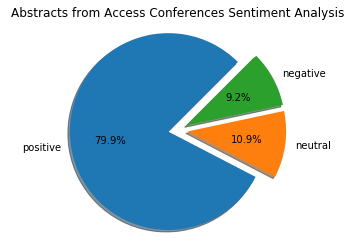

In [92]:

#Plot out that binary info into a nice pie
plt.pie([float(s) for s in summary.values()],labels=[str(l) for l in summary.keys()],autopct='%.1f%%', explode=[.1,.1,.1], shadow=True, startangle=45)
plt.axis('equal')
plt.title("Abstracts from Access Conferences Sentiment Analysis")
plt.show()